https://www.musinsa.com/app/codimap/views/19793?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=2
https://www.musinsa.com/app/codimap/views/19769?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=2
https://www.musinsa.com/app/codimap/views/19760?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=2
https://www.musinsa.com/app/codimap/views/19747?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=2
https://www.musinsa.com/app/codimap/views/19741?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=3
https://www.musinsa.com/app/codimap/views/19695?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=3
https://www.musinsa.com/app/codimap/views/19686?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=3
https://www.musinsa.com/app/codimap/views/19660?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=4
https://www.musinsa.com/app/codi

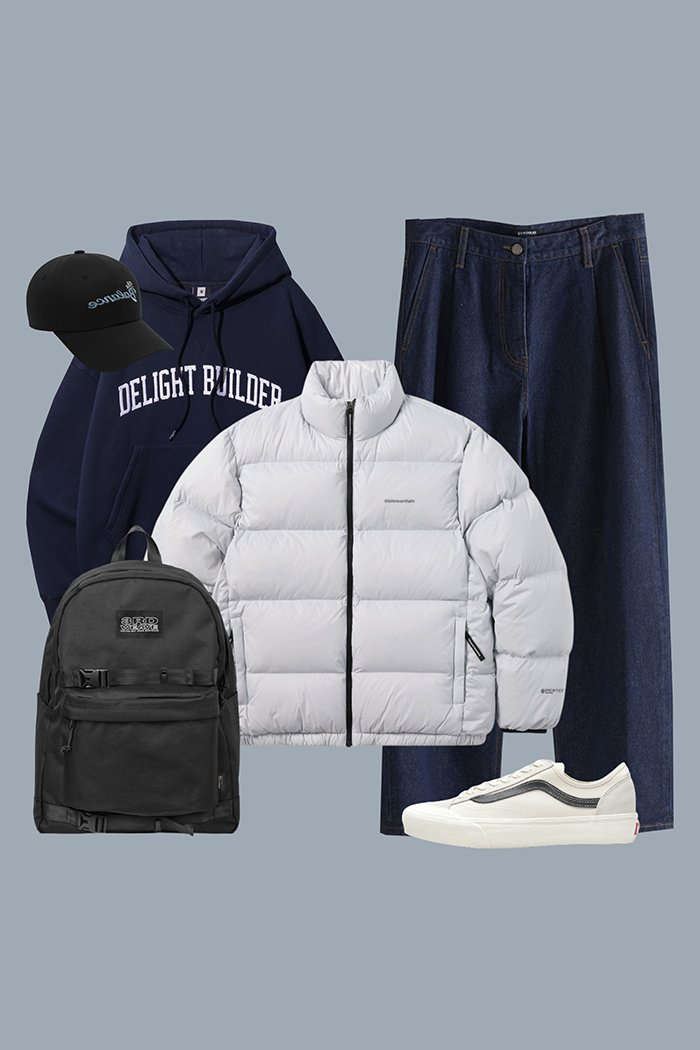

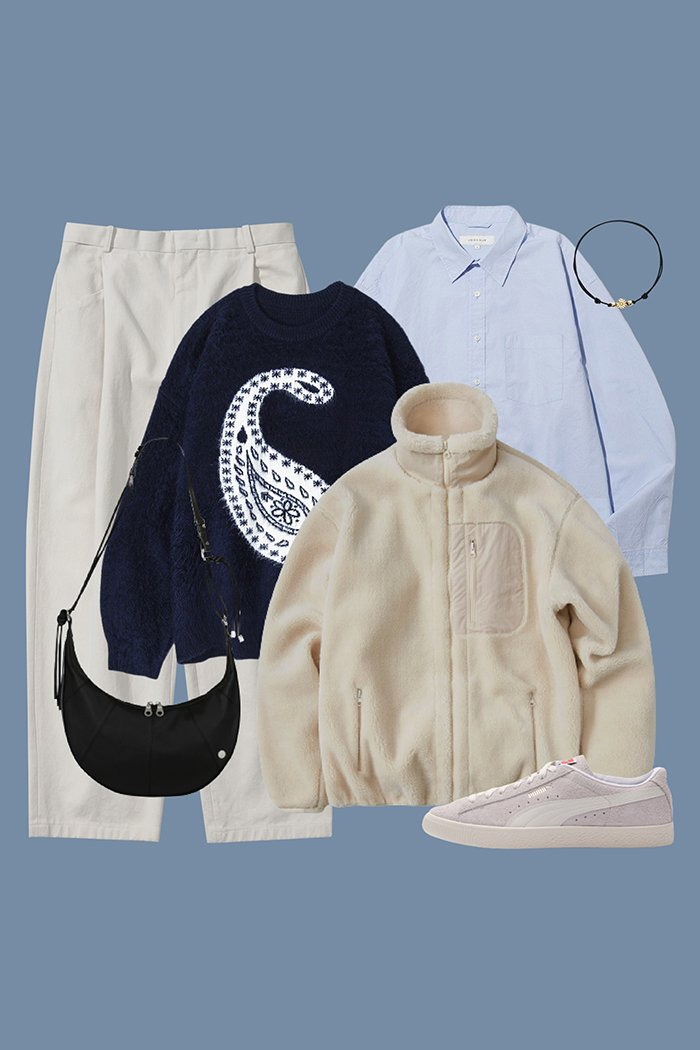

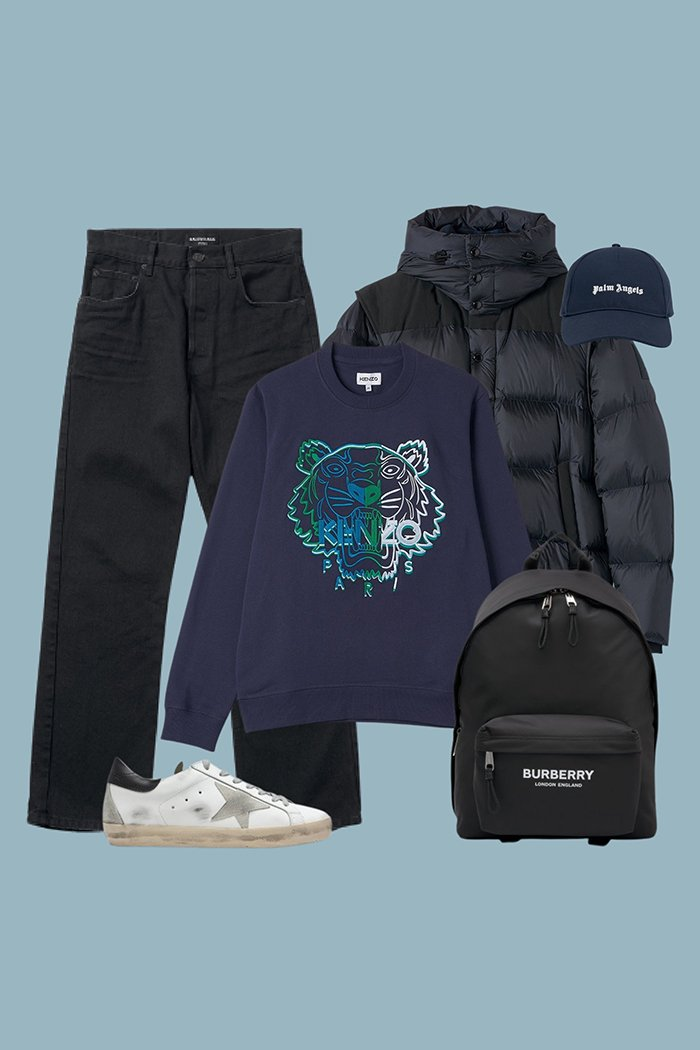

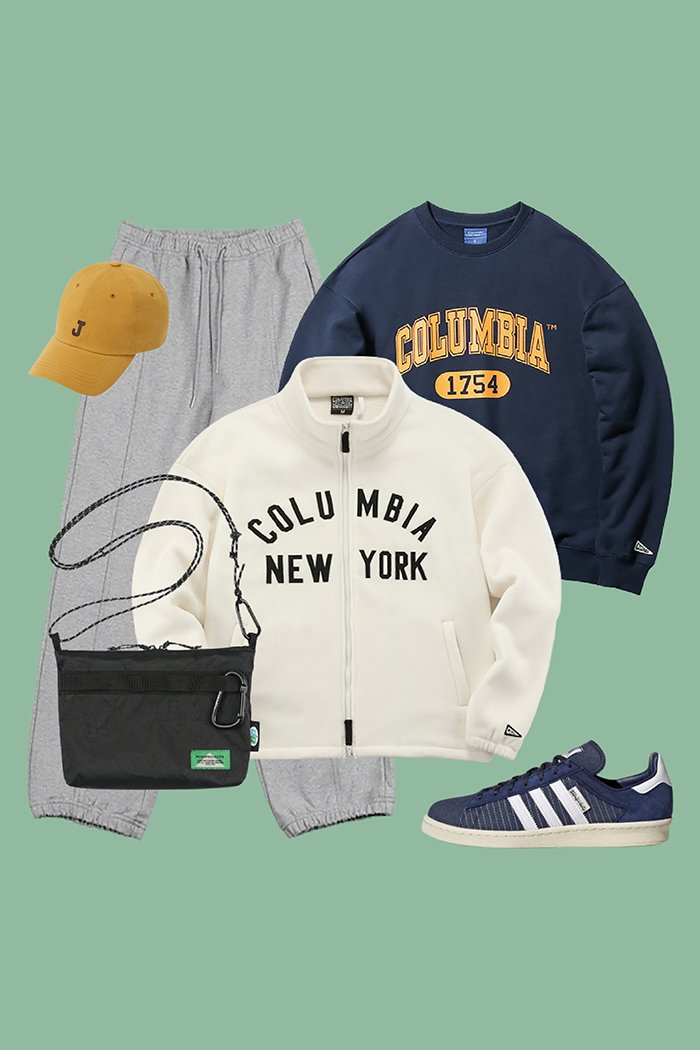

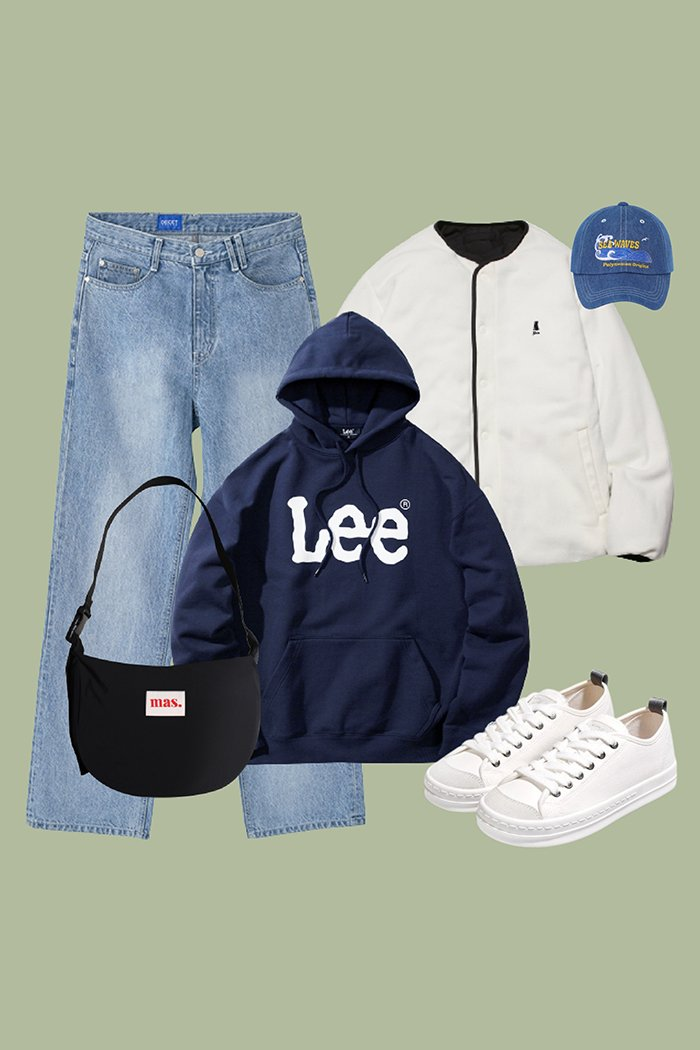

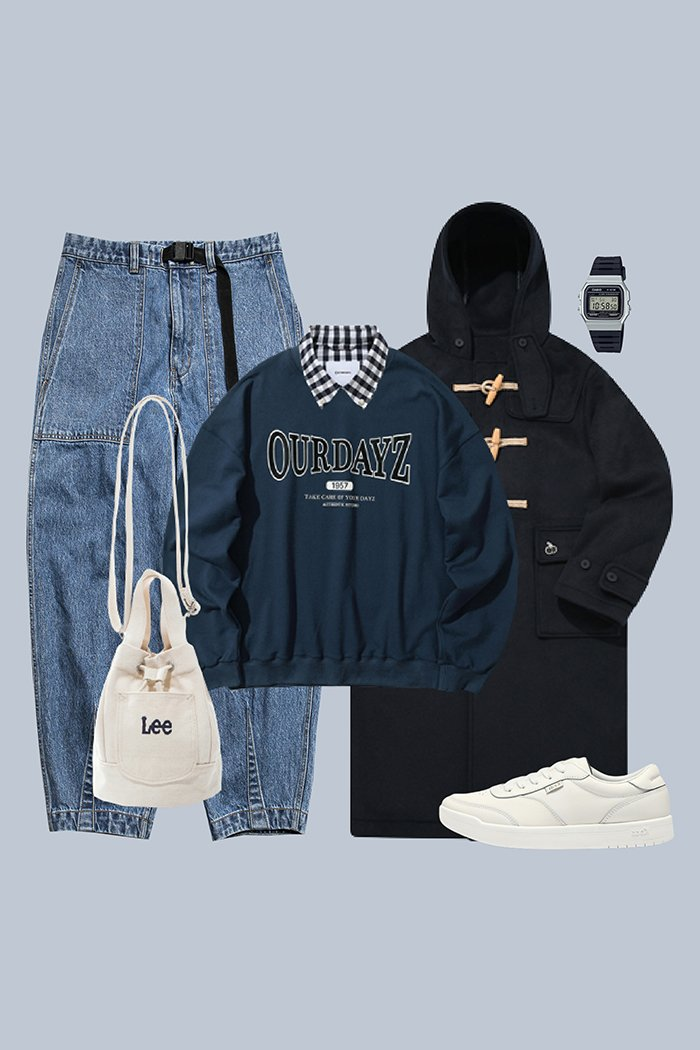

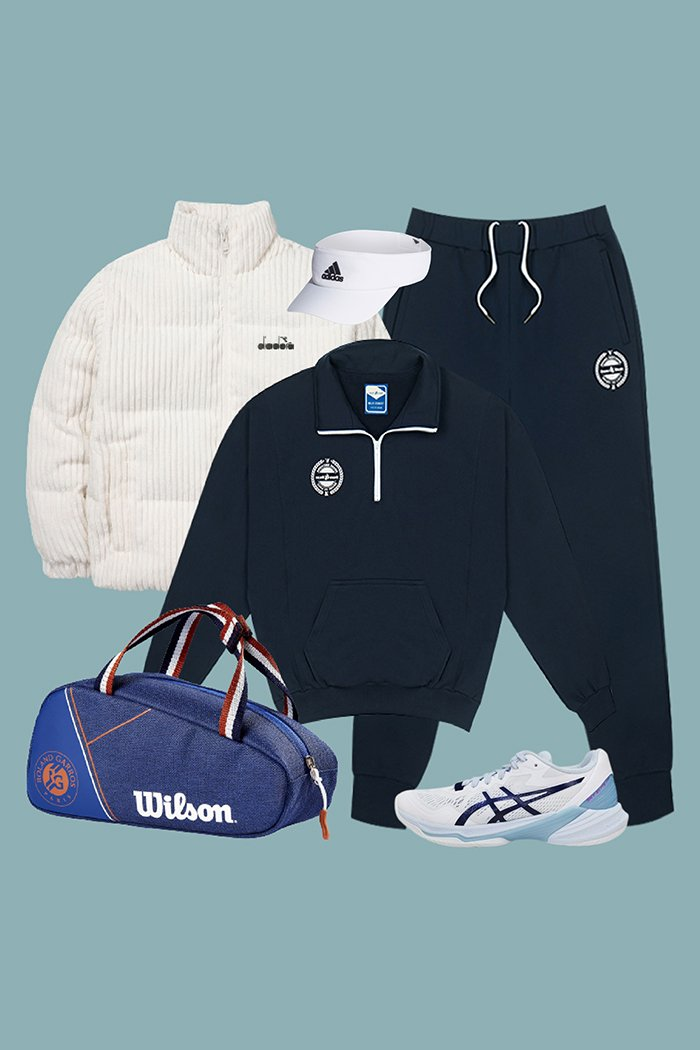

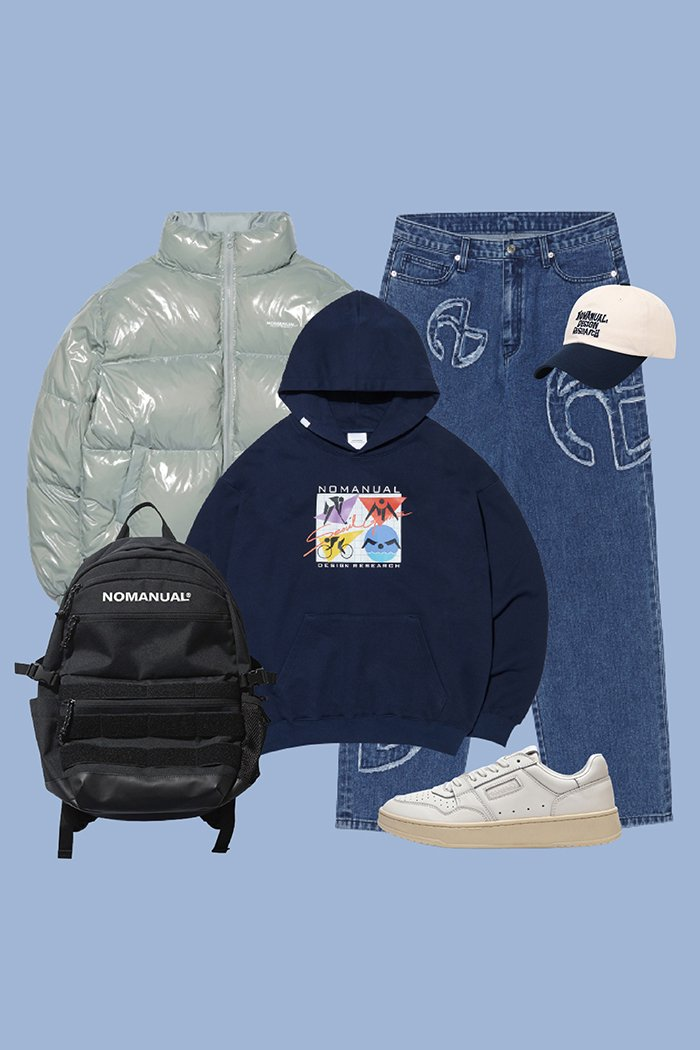

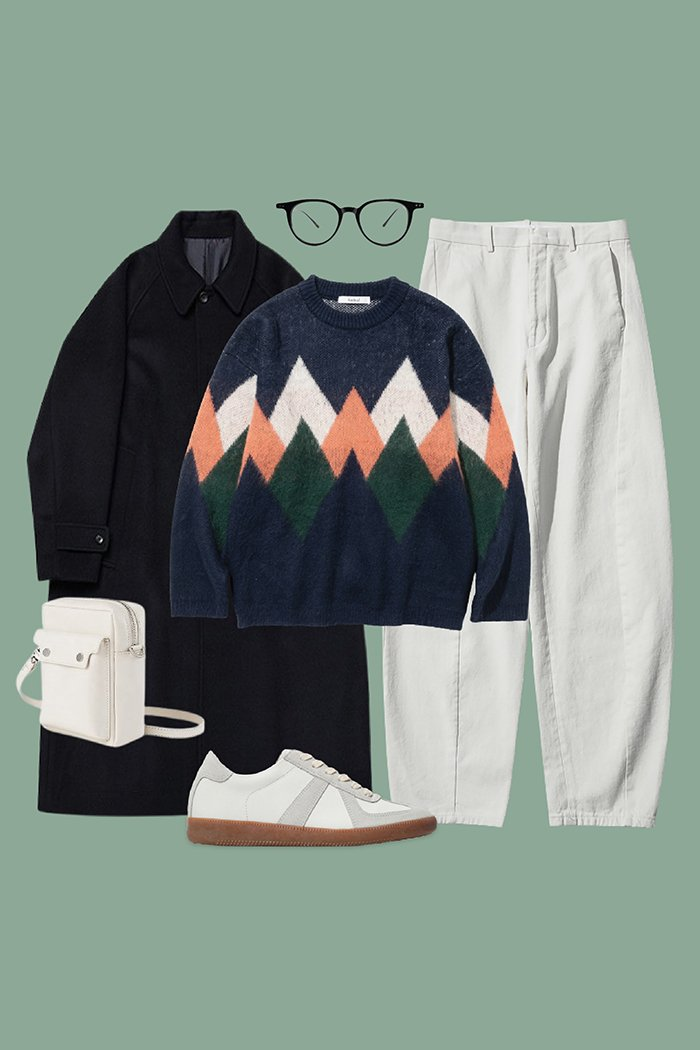

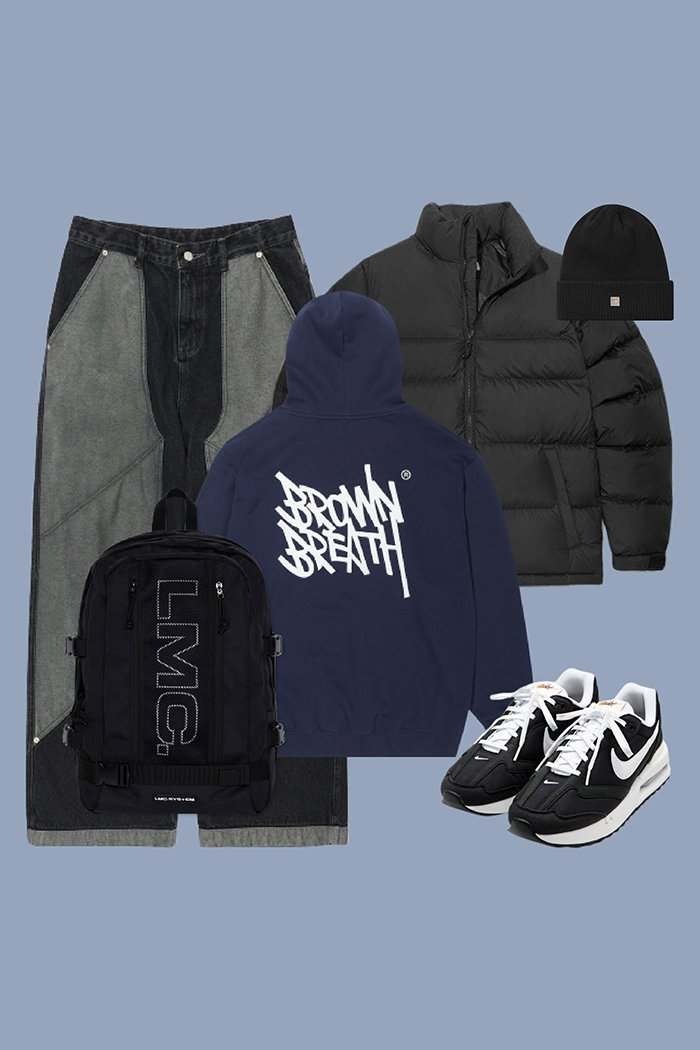

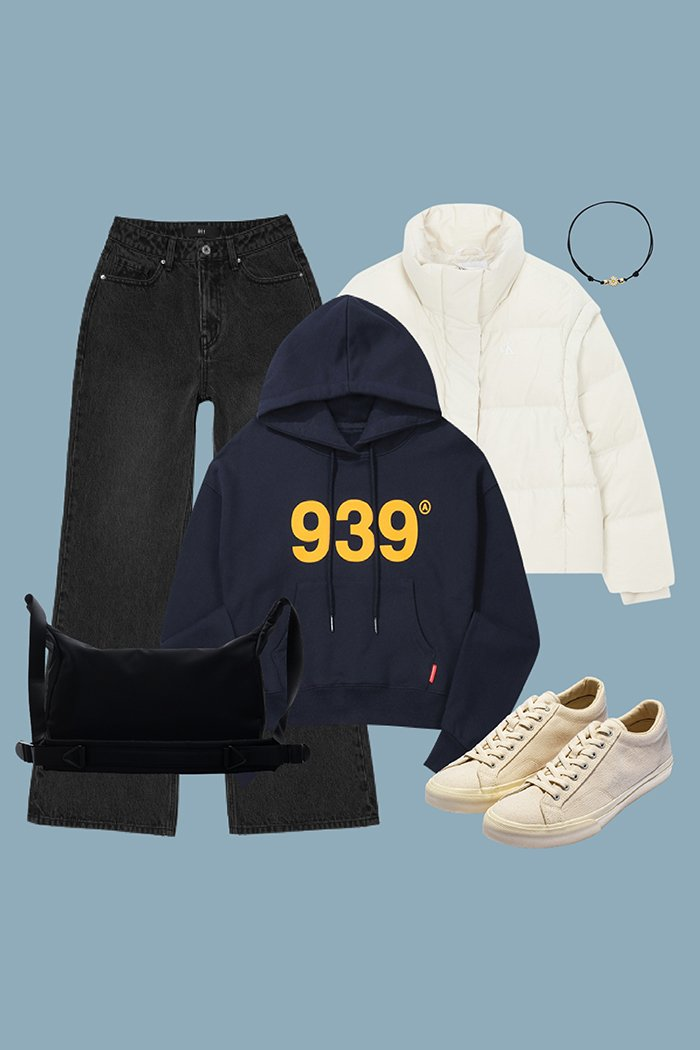

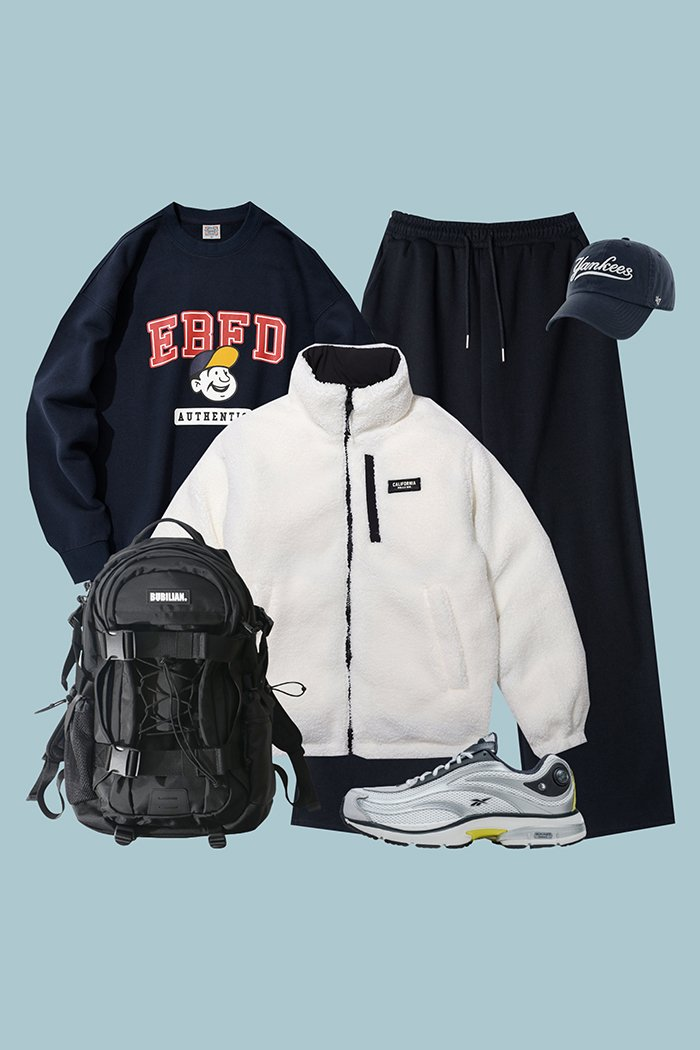

In [216]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.preprocessing import LabelEncoder

#CSV 파일 가져오기
result_cody_detail = pd.read_csv('/content/drive/MyDrive/SWFestival/each_cody_detail_df.csv', encoding='UTF8')
result_item_detail = pd.read_csv('/content/drive/MyDrive/SWFestival/each_item_detail_df.csv',encoding='UTF8')
result_style = pd.read_csv('/content/drive/MyDrive/SWFestival/each_cody_df.csv', encoding='cp949')

#result_item_detail에 있는 Unnamed: 0 column을 삭제해주고 string형태로 되어있는 리스트를 정제해서 list로 만들고 dataframe에 추가한다
result_item_detail.drop(['Unnamed: 0'], axis=1, inplace=True)
final_final_list = []
for a,i in result_item_detail.iterrows():
  for j in i:
    new_list5 = []
    if j is not np.NaN:
      for k in j.replace('[', '').replace(']', '').replace('\'', '').split(','):
        new_list5.append(k.strip())
      final_final_list.append(new_list5)

result_item_detail_new = pd.DataFrame(final_final_list, columns = ['카테고리', '이름', '색깔', '사이트', '삭제'])
result_item_detail_new.drop(['삭제'], axis=1, inplace=True)

#result_cody_detail에서도 똑같이 Unnamed:0를 drop 시키고 알맞는 column을 할당시켜준다
result_cody_detail.drop(['Unnamed: 0'], axis=1, inplace=True)
result_cody_detail.columns = ['사이트', 'hashtag', '아우터1', '아우터2', '아우터3', '아우터4', '상의1', '상의2','상의3', '상의4', '바지1', '바지2', '신발', '악세사리1', '악세사리2', '악세사리3','악세사리4']

#result_style에서도 Unnamed: 0를 drop 해주고 이것도 똑같이 replace로 정제후 split해서 리스트로 만들고 각 아이템별로 데이터프레임 row에 추가한다
result_style.drop(['Unnamed: 0'], axis=1, inplace=True)
final_list = []
new_list = []
for a,i in result_style.iterrows():
  if (a+1) %2 == 1:
    new_list.append(i[0])
  if (a+1) % 2 == 0:
    for j in i[0].replace('[', '').replace(']', '').replace('\'', '').split(','):
      new_list.append(j.strip())
    final_list.append(new_list)
    new_list = []

#그러고 나서 알맞는 column name을 할당해준다.
brand_new_df = pd.DataFrame(final_list)
brand_new_df.columns = column_name = ['image', '사이트', '아우터1', '아우터2', '아우터3', '아우터4', '상의1', '상의2','상의3', '상의4', '바지1', '바지2', '신발', '악세사리1', '악세사리2', '악세사리3','악세사리4']
result_style = brand_new_df
result_style

#각 아이템에 대한 설명에서 카테고리와 색깔이 string으로 되어있으면 모델에 돌리기 힘들기때문에 각기 다른 labelencoder로 정수형태로 바꾸어 본다
le = LabelEncoder()
result_item_detail_new['카테고리'] = le.fit_transform(result_item_detail_new['카테고리'])
le2 = LabelEncoder()
result_item_detail_new['색깔'] = le2.fit_transform(result_item_detail_new['색깔'])

#이는 각 label encoding 의 결과이다
#le.classes_, le2.classes_
# array ['가방', '기구/용품/장비', '디지털/테크', '모자', '바지', '상의', '생활/취미/예술',
#        '선글라스/안경테', '속옷', '스니커즈', '스커트', '스포츠잡화', '시계', '신발', '아우터',
#        '액세서리', '양말/레그웨어', '여성 가방', '주얼리', '책/음악/티켓', '하의'],
# array ['beige', 'brown', 'cream', 'grey', 'mint', 'navy', 'not shown','white', '카리나 착용 빅볼청키 다이아 모노그램 B D.Beige']

#cosine 유사도를 구하기 위한 코사인 유사도 식이 있는 코드이다
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

#이는 예시 파일이다. 예시로 상의카테고리에 navy옷을 업로드 했다고 하면
new_item = [5,5] #상의, navy
index = result_item_detail_new[result_item_detail_new[['카테고리', '색깔']] == new_item][['카테고리', '색깔']].dropna().index
#이 코드를 실행하면 그 상의 navy 인 옷들의 사이트, 즉 기본키가 출력이 된다
#result_item_detail_new.loc[index]['사이트']

#고로 밑의 코드를 실행하면 그 옷들의 사이트의 기본키를 활용하여, 그 기본키가 존재하는 코디들의 사이트, 기본키를 가져온다. 즉 외래키를 통해서 코디의 기본키를 찾는 것이다
total_list= []
for i in result_item_detail_new.loc[index]['사이트']:
  for a, j in result_cody_detail.iterrows():
    if i in list(j):
      print(j[0])
      total_list.append(j[0])

#이 코드를 이용해서 어떤 사진이 출력되었는지 확인할 수 있다. 
for i in total_list:
  image_first = result_style[result_style['사이트'] == i]['image'].to_string()
  path = '/content/drive/MyDrive/SWFestival/사진/' + image_first.strip().split(' ')[-1]
  image = cv2.imread(path)
  cv2_imshow(image)